# Model for content based filtering
This notebook process data to create a ml model.

## Loading data from csv

In [1]:
import pandas as pd
df = pd.read_csv("dataset_movies.csv")
df.set_index("id",inplace=True)
# Compute mean of columns
runtime_mean = int(df["runtime"].mean())
budget_mean = int(df["budget"].mean())
revenue_mean = int(df["revenue"].mean())

# Substitute runtime NaN with average runtime
df["runtime"].replace(0,runtime_mean,inplace=True)
df["budget"].replace(0,budget_mean,inplace=True)
df["revenue"].replace(0,revenue_mean,inplace=True)
df

,budget,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,1566527,Ariel,8.165,10/21/1988,4061977,73,6.8,157,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1566527,Varjoja paratiisissa,8.509,10/17/1986,4061977,74,7.2,158,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,Four Rooms,14.441,12/9/1995,4257354,98,5.7,2127,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,Judgment Night,13.336,10/15/1993,12136938,110,6.5,230,1,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,Life in Loops (A Megacities RMX),2.352,1/1/2006,4061977,80,7.5,18,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205260,1566527,Your Self Image,0.600,1/1/1971,4061977,8,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205261,1566527,Suicide: It Doesn't Have to Happen,0.600,1/1/1976,4061977,21,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205262,1566527,Prequel: The Dawn of Lying,1.960,12/17/2009,4061977,6,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing data to ML Model

### Drop Dates before 1900
We drop movies before 1900.

In [5]:
import re

def find_1800(date):
    """This function find for "yyyy-mm-dd" or "yyyy-dd-mm" format date.\n
    Return a bool series list where true if are occurence."""
    return bool(re.findall(r"18[0-9]{2}-[0-9]{2}-[0-9]{2}",date))

print("Rows to drop.")
print(df["release_date"][df["release_date"].apply(find_1800)])

Rows to drop.
id
160       1896-01-25
774       1895-03-22
16463     1888-10-14
16464     1888-10-15
16612     1894-03-14
             ...    
198361    1898-03-06
198362    1896-08-23
198363    1897-01-01
201406    1897-10-11
203472    1899-01-01
Name: release_date, Length: 592, dtype: object


In [6]:
drop_index = df["release_date"][df["release_date"].apply(find_1800)].index
df.drop(drop_index, inplace=True)

print("-----------------------------------------")
print("Rows in 'yyyy-mm-dd' format after drop")
print(df["release_date"][df["release_date"].apply(find_1800)])

-----------------------------------------
Rows in 'yyyy-mm-dd' format after drop
Series([], Name: release_date, dtype: object)


### Extracting title and release date column
We will use this dataframe to extract name by id.

In [7]:
titles = df[["original_title","release_date"]]
titles

,original_title,release_date
id,,
2,Ariel,10/21/1988
3,Varjoja paratiisissa,10/17/1986
5,Four Rooms,12/9/1995
6,Judgment Night,10/15/1993
8,Life in Loops (A Megacities RMX),1/1/2006
...,...,...
205260,Your Self Image,1/1/1971
205261,Suicide: It Doesn't Have to Happen,1/1/1976
205262,Prequel: The Dawn of Lying,12/17/2009


### Eliminate title column from dataframe

In [8]:
df.drop("original_title",axis=1,inplace=True)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,1566527,8.165,10/21/1988,4061977,73,6.8,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1566527,8.509,10/17/1986,4061977,74,7.2,158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,14.441,12/9/1995,4257354,98,5.7,2127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,13.336,10/15/1993,12136938,110,6.5,230,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,2.352,1/1/2006,4061977,80,7.5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205260,1566527,0.600,1/1/1971,4061977,8,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205261,1566527,0.600,1/1/1976,4061977,21,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205262,1566527,1.960,12/17/2009,4061977,6,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transform date to ordinal

In [9]:
from datetime import datetime

def date_to_ordinal(date):
    """Transform date in format %Y/%m/%d to ordinal date type."""
    if date != "0":
        return datetime.strptime(date, "%m/%d/%Y").toordinal()
    else:
        return 0

#apply method apply function in all element column(s)
#transform method is similar to apply
df["release_date"] = df["release_date"].apply(date_to_ordinal)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,1566527,8.165,726031,4061977,73,6.8,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1566527,8.509,725296,4061977,74,7.2,158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,14.441,728636,4257354,98,5.7,2127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,13.336,727851,12136938,110,6.5,230,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,2.352,732312,4061977,80,7.5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205260,1566527,0.600,719528,4061977,8,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205261,1566527,0.600,721354,4061977,21,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205262,1566527,1.960,733758,4061977,6,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Replace 0 release date for mean ordinal date

In [10]:
release_date_mean = int(df["release_date"].mean())
df["release_date"].replace(0,release_date_mean,inplace=True)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,1566527,8.165,726031,4061977,73,6.8,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1566527,8.509,725296,4061977,74,7.2,158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,14.441,728636,4257354,98,5.7,2127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,13.336,727851,12136938,110,6.5,230,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,2.352,732312,4061977,80,7.5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205260,1566527,0.600,719528,4061977,8,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205261,1566527,0.600,721354,4061977,21,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205262,1566527,1.960,733758,4061977,6,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalize data using MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object (x-mu)/sigma
scaler = MinMaxScaler()
# Just normalize first 7 columns
scaler.fit(df.iloc[:, :7])

#Create new pandas dataframe
df_standard = pd.DataFrame(scaler.transform(df.iloc[:,:7]),columns=df.iloc[:,:7].columns)
df_standard["id"] = df.index
df_standard.set_index("id",inplace=True)

# Concat standar dataframe (first 7 columns) with df[:,7:]
df_standard = pd.concat([df_standard,df.iloc[:,7:]],axis=1)
df_standard

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,0.004122,0.018780,0.710639,0.001427,0.008001,0.68,0.005038,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.004122,0.019633,0.694536,0.001427,0.008112,0.72,0.005070,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.010526,0.034359,0.767714,0.001495,0.010779,0.57,0.068247,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.055263,0.031616,0.750515,0.004263,0.012112,0.65,0.007380,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0.000111,0.004349,0.848254,0.001427,0.008779,0.75,0.000578,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205260,0.004122,0.000000,0.568161,0.001427,0.000778,0.00,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205261,0.004122,0.000000,0.608168,0.001427,0.002222,0.00,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205262,0.004122,0.003376,0.879935,0.001427,0.000556,0.20,0.000032,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using Metric to fin top 10 Movies

### Looking for id Movie

In [12]:
from jellyfish import levenshtein_distance

# Looking for similarity names movies
movie_name = "Batman: The Dark Knight Returns"

# Calculates distance beetwen movie name and list fo titles
idx = titles["original_title"].apply(
    lambda x: levenshtein_distance(movie_name,x))
idx = idx.sort_values()[:10]    # Sort vector distances and extract first 10
titles.loc[idx.index]           # Show title names

,original_title,release_date
id,,
142061,"Batman: The Dark Knight Returns, Part 2",1/3/2013
123025,"Batman: The Dark Knight Returns, Part 1",8/21/2012
37620,The Black Knight Returns,2/1/2009
50556,Batbabe: The Dark Nightie,2/24/2009
49026,The Dark Knight Rises,7/16/2012
13851,Batman: Gotham Knight,7/8/2008
53111,Billy The Kid Returns,9/4/1938
17549,UFC 39: The Warriors Return,9/27/2002
203596,The Prodigal Returns,5/30/2013


### Using euclidean distance to find similar movies

In [28]:
from sklearn.metrics.pairwise import euclidean_distances

movie_id = 142061 # Movie id to test
print("Selected movie: {} ({})".format(
      titles.loc[movie_id].values[0],
      titles.loc[movie_id].values[1]))
n = 10      # Number of similar movies

# Calculate distances (euclidean distance)
distances = euclidean_distances(
    df_standard.loc[movie_id].values.reshape(1, -1),
    df_standard)
distances = pd.DataFrame(distances,columns=df.index)

# Order values by ascending order
recomendations = distances.iloc[0].sort_values()[1:n+1]

# Get names of movies
top = titles.loc[recomendations.index]
top.columns = ["Title","Release Date"] # Rename columns
top

Selected movie: Batman: The Dark Knight Returns, Part 2 (1/3/2013)
Processing time: 0.021996736526489258


,Title,Release Date
id,,
123025,"Batman: The Dark Knight Returns, Part 1",8/21/2012
14571,機動警察パトレイバー 劇場版,7/15/1989
76589,Justice League: Doom,2/28/2012
40662,Batman: Under the Red Hood,7/27/2010
14092,攻殻機動隊 2.0,7/12/2008
71883,レッドライン,5/27/2010
51859,トライガン バッドランド ランブル,4/2/2010
30675,Planet Hulk,2/2/2010
11299,カウボーイビバップ 天国の扉,9/1/2001


### Extract covers top 10
Function to extract request image object.

In [20]:
def extract_img(movie_id):
    # Api data and movie index example
    api_key = "44f9a7f09387a49408460a6d158e1f44"
    # URL to retrieve movie info
    url = "https://api.themoviedb.org/3/movie/" + \
        str(movie_id) + "?api_key=" + api_key
    # Making a request example
    request_obj = requests.get(url).text
    # Load dictionary with file info from request
    row = json.loads(request_obj)
    # Poster URL
    poster_url = "https://image.tmdb.org/t/p/w500"+str(row.get("poster_path"))
    return requests.get(poster_url)

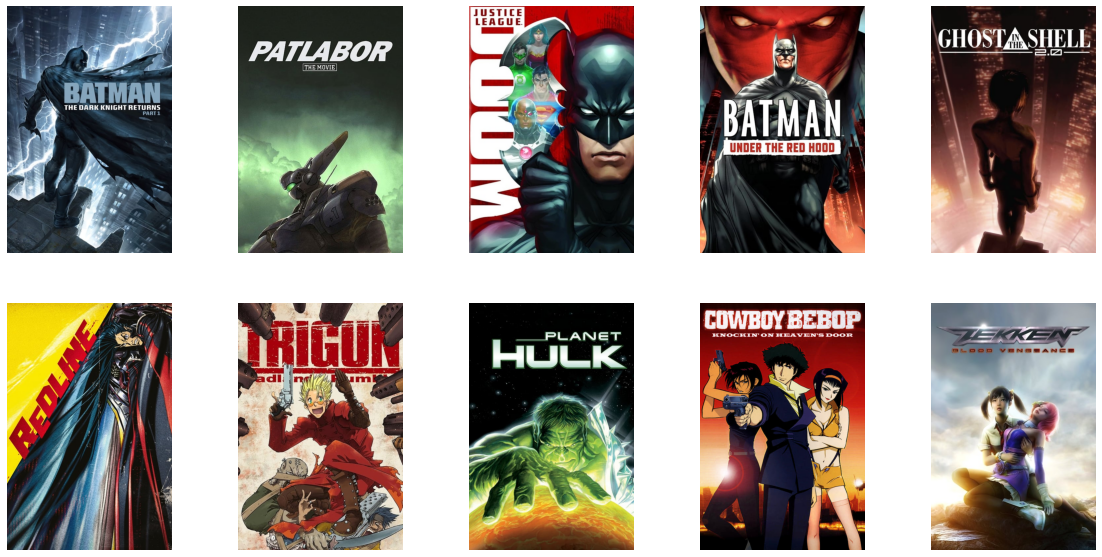

In [21]:
from matplotlib import pyplot as plt
from PIL import Image
from io import BytesIO
import json
import requests

counter = 0
plt.figure(figsize=(20,10))
for movie_idx in top.index:
    poster_img = extract_img(movie_idx)
    if poster_img.status_code == 200:
        imshow = Image.open(BytesIO(poster_img.content))
        plt.subplot(2,5,counter+1)
        plt.axis('off')
        plt.imshow(imshow)
        counter += 1
plt.show()